In [1]:
!pip install matplotlib
!pip install sklearn
!pip install pandas
!pip install gensim
!pip install nltk
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
%matplotlib inline

     |████████████████████████████████| 10.3 MB 4.7 MB/s eta 0:00:01
     |████████████████████████████████| 3.1 MB 45.6 MB/s eta 0:00:01
     |████████████████████████████████| 1.1 MB 32.7 MB/s eta 0:00:01
     |████████████████████████████████| 15.7 MB 32.1 MB/s eta 0:00:01��████████████████████▋          | 10.6 MB 32.1 MB/s eta 0:00:01
     |████████████████████████████████| 23.1 MB 4.6 MB/s eta 0:00:01
     |████████████████████████████████| 28.5 MB 37.7 MB/s eta 0:00:01    |██████▌                         | 5.8 MB 37.7 MB/s eta 0:00:01��████████▏       | 21.5 MB 37.7 MB/s eta 0:00:01
     |████████████████████████████████| 306 kB 63.3 MB/s eta 0:00:01
  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1309 sha256=5205c8e7af9e719c181e2c91b9354341efad967fc13a0e5a18d92e9168f65c99
  Stored in directory: /home/jovyan/.cache/pip/wheels/46/ef/c3/157e41f5ee1372d1be90b09f74f82b10e391eaacca8f22d33e
Successfully built sklearn
     |████████████████████████████████| 1

[nltk_data] Downloading package stopwords to /home/jovyan/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [48]:
# Importing modules
import pandas as pd
import os
import glob
import csv

# path for original transript csv files
# path = '/home/jovyan/Transcripts/'
# path for speaker grouped transript csv files
path = '/home/jovyan/GroupedTranscripts/'

allfiles = glob.glob(path + "*.csv")

###############################
# get all files normally
# fileList = []
# for file in allfiles:
#     df = pd.read_csv(file, header=None, sep='\n', quoting=csv.QUOTE_NONE, encoding='utf-8')
#     fileList.append(df)

# papers = pd.concat(fileList, axis=0, ignore_index=True)
# Print head
# papers.head()
###############################

# get all 2019, 2020, 2021 csvs
year = "2019"
fileList = []
for file in allfiles:
    if(year in file):
        df = pd.read_csv(file, header=None, sep='\n', quoting=csv.QUOTE_NONE, encoding='utf-8')
        fileList.append(df)
        
year1 = "2020"
fileList1 = []
for file in allfiles:
    if(year1 in file):
        df = pd.read_csv(file, header=None, sep='\n', quoting=csv.QUOTE_NONE, encoding='utf-8')
        fileList1.append(df)
        
year2 = "2021"
fileList2 = []
for file in allfiles:
    if(year2 in file):
        df = pd.read_csv(file, header=None, sep='\n', quoting=csv.QUOTE_NONE, encoding='utf-8')
        fileList2.append(df)
        
papers = pd.concat(fileList, axis=0, ignore_index=True)
papers1 = pd.concat(fileList1, axis=0, ignore_index=True)
papers2 = pd.concat(fileList2, axis=0, ignore_index=True)

# Print head
papers.head()
# print('---------------')
# papers1.head()
# print('---------------')
# papers2.head()
# print('---------------')


,0
0,"CHAIRPERSON: Good morning Ms Molefe, good mor..."
1,ADV REFILOE MOLEFE: Good morning Chair. Ye...
2,MS MATHANE EVELINE MAKGATHO: Correct Chair. ...
3,MS MAHANE EVELINE MAKGATHO: Correct Chair.
4,CHAIRERSON: And you have been the one who h...


In [49]:
# Load the regular expression library
import re
# 2019
# Remove punctuation
papers['speech_processed'] = \
papers[0].map(lambda x: re.sub('[,\.!?]', '', x))
# Convert the titles to lowercase
papers['speech_processed'] = \
papers['speech_processed'].map(lambda x: x.lower())
# Print out the first rows of papers
papers['speech_processed'].head()

# 2020
# Remove punctuation
papers1['speech_processed'] = \
papers1[0].map(lambda x: re.sub('[,\.!?]', '', x))
# Convert the titles to lowercase
papers1['speech_processed'] = \
papers1['speech_processed'].map(lambda x: x.lower())
# Print out the first rows of papers
papers1['speech_processed'].head()

# 2021
# Remove punctuation
papers2['speech_processed'] = \
papers2[0].map(lambda x: re.sub('[,\.!?]', '', x))
# Convert the titles to lowercase
papers2['speech_processed'] = \
papers2['speech_processed'].map(lambda x: x.lower())
# Print out the first rows of papers
papers2['speech_processed'].head()
# print(papers.shape)

0    chairperson:   good morning mr pretorius  good...
1    adv pretorius sc:   good morning chair     [mi...
2    ms k:   good morning     yes chair i understan...
3                               inquiry resumes:      
4    counsel: thanks chair can we comfortably sit d...
Name: speech_processed, dtype: object

In [51]:
# remove emojis
# 2019
import re
papers = papers.astype(str).apply(lambda x: x.str.encode('ascii', 'ignore').str.decode('ascii'))
# papers.head()
# 2020
import re
papers1 = papers1.astype(str).apply(lambda x: x.str.encode('ascii', 'ignore').str.decode('ascii'))
papers1.head()
# 2021
import re
papers2 = papers2.astype(str).apply(lambda x: x.str.encode('ascii', 'ignore').str.decode('ascii'))
# papers2.head()

In [61]:
# remove stopwords
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['ja', 'oh', 'chairperson', 'chair', 'mr', 'ms', 'go', 'yes', 'no', 'say', 'know', 'see', 'one', 'neh','adv',
                   'intervenes', 'okay', 'resumes', 'adjourns', 'hm', 'said', 'saying', 'proceed', 'thank', 'good', 'morning',
                  'inquiry', 'thank', 'sc','correct', 'indistinct','intervention', 'van', 'der', 'help', 'page', 'think', 
                  'chairman', 'think', 'like', 'page', 'rise', 'court'])
papers['speech_processed1'] = papers['speech_processed'].apply(lambda words: ' '.join(word.lower() for word in words.split() if word not in stop_words))
papers['speech_processed1'].head()

papers2['speech_processed1'] = papers['speech_processed'].apply(lambda words: ' '.join(word.lower() for word in words.split() if word not in stop_words))
papers2['speech_processed1'].head()

papers1['speech_processed1'] = papers['speech_processed'].apply(lambda words: ' '.join(word.lower() for word in words.split() if word not in stop_words))
papers1['speech_processed1'].head()

0    chairperson: molefe everybody ready let us ahe...
1    refiloe molefe: makgatho yesterdays adjournmen...
2    mathane eveline makgatho: advocate memorandum ...
3                             mahane eveline makgatho:
4                        chairerson: initiated meeting
Name: speech_processed1, dtype: object

Loading dataset...
done in 0.001s.
Extracting tf-idf features for NMF...
Extracting tf features for LDA...

Fitting the NMF model (Frobenius norm) with tf-idf features, n_samples=2500 and n_features=1000...
done in 2.997s.


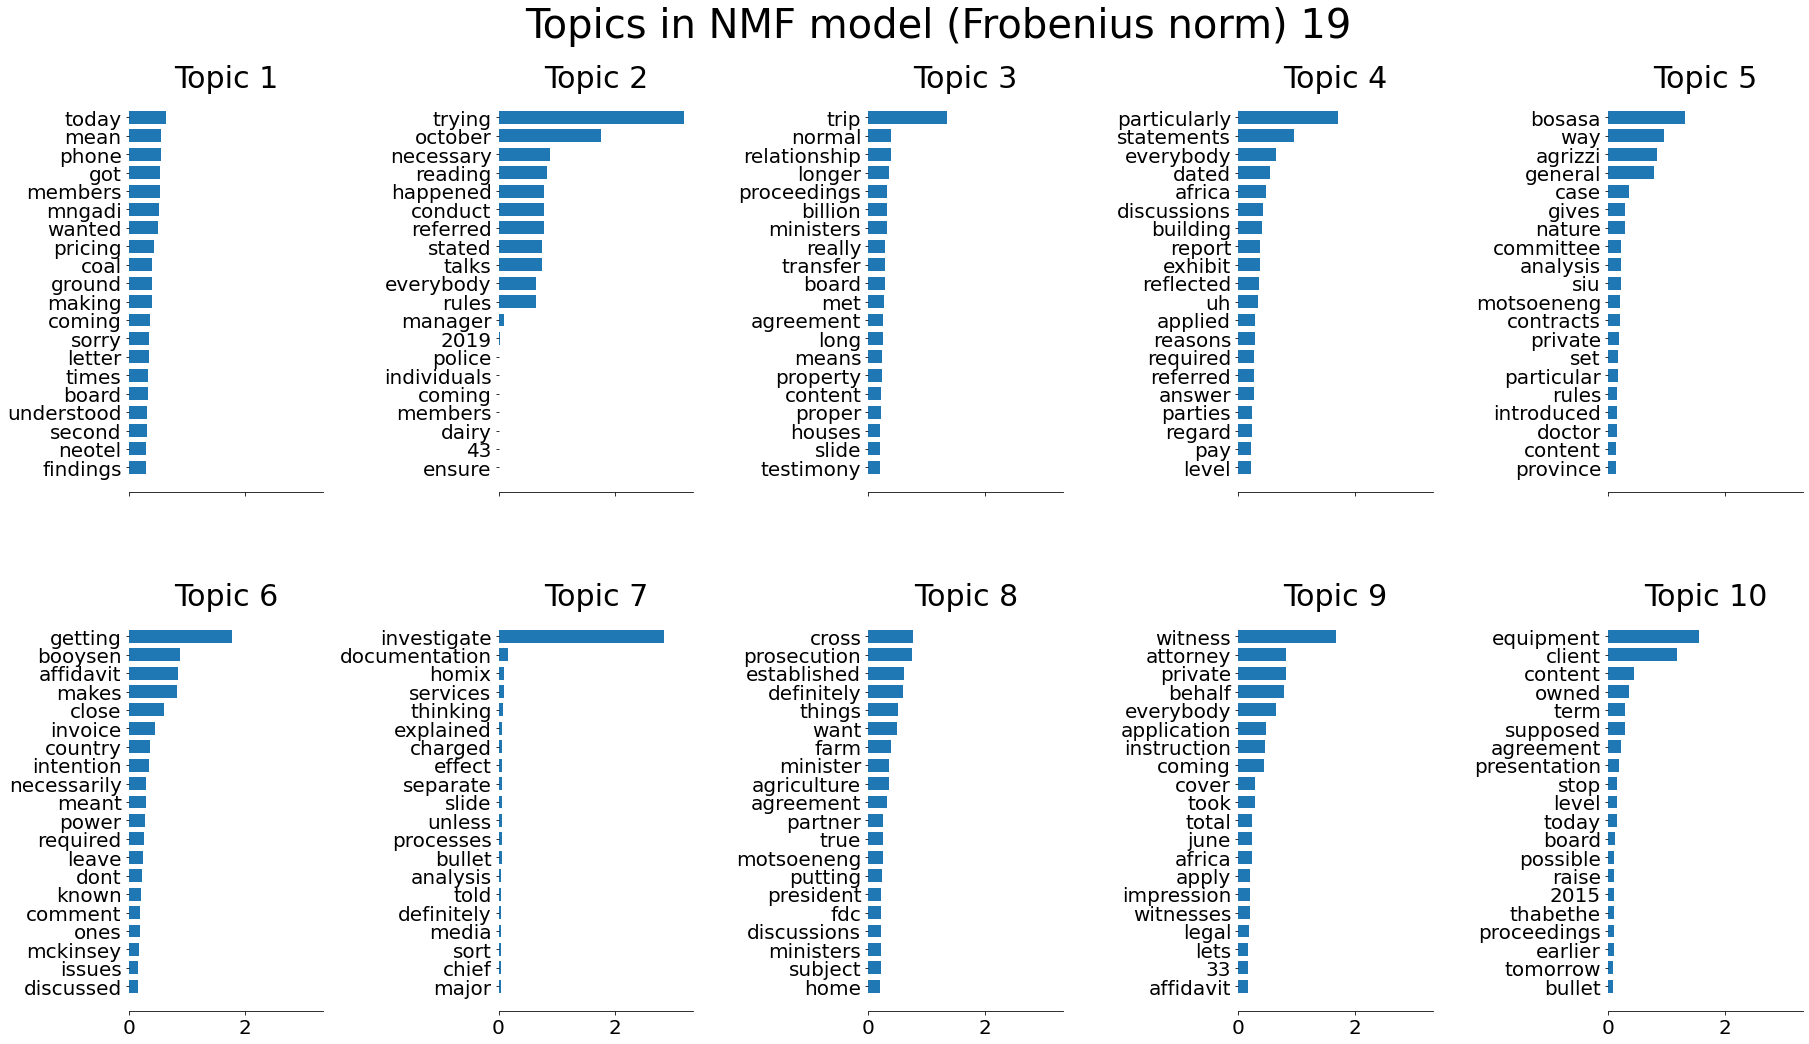

---->  [0.14157621564199405, 0.4140865286500952, 0.2648229649524664, 0.30011813769262685, 0.31606892712128953, 0.30119346049206114, 0.742695555075948, 0.2057502619566324, 0.28639203964043003, 0.4664654825215033]


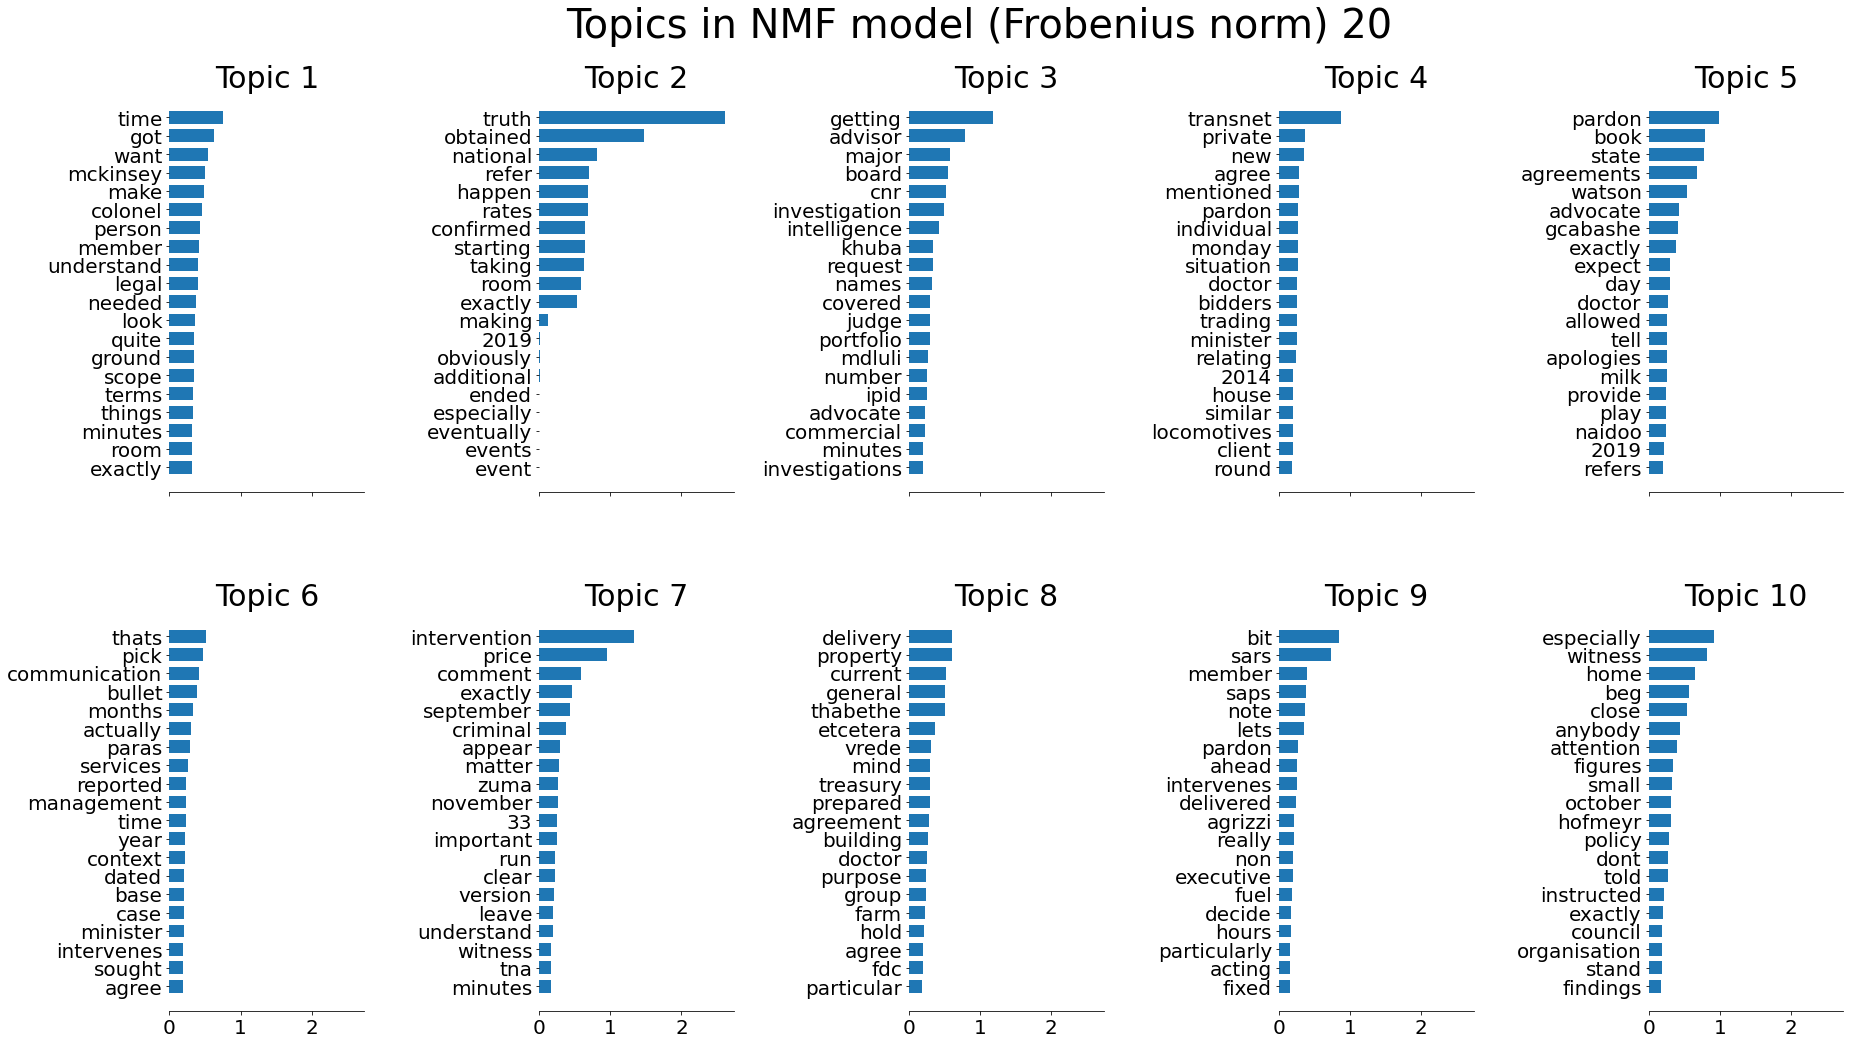

---->  [0.16521789680843885, 0.40178861718653003, 0.2472083388025451, 0.21946588422349086, 0.22128172408361985, 0.17770851207901553, 0.3142156453734789, 0.1842212185107702, 0.2689652554940115, 0.22959700324129004]


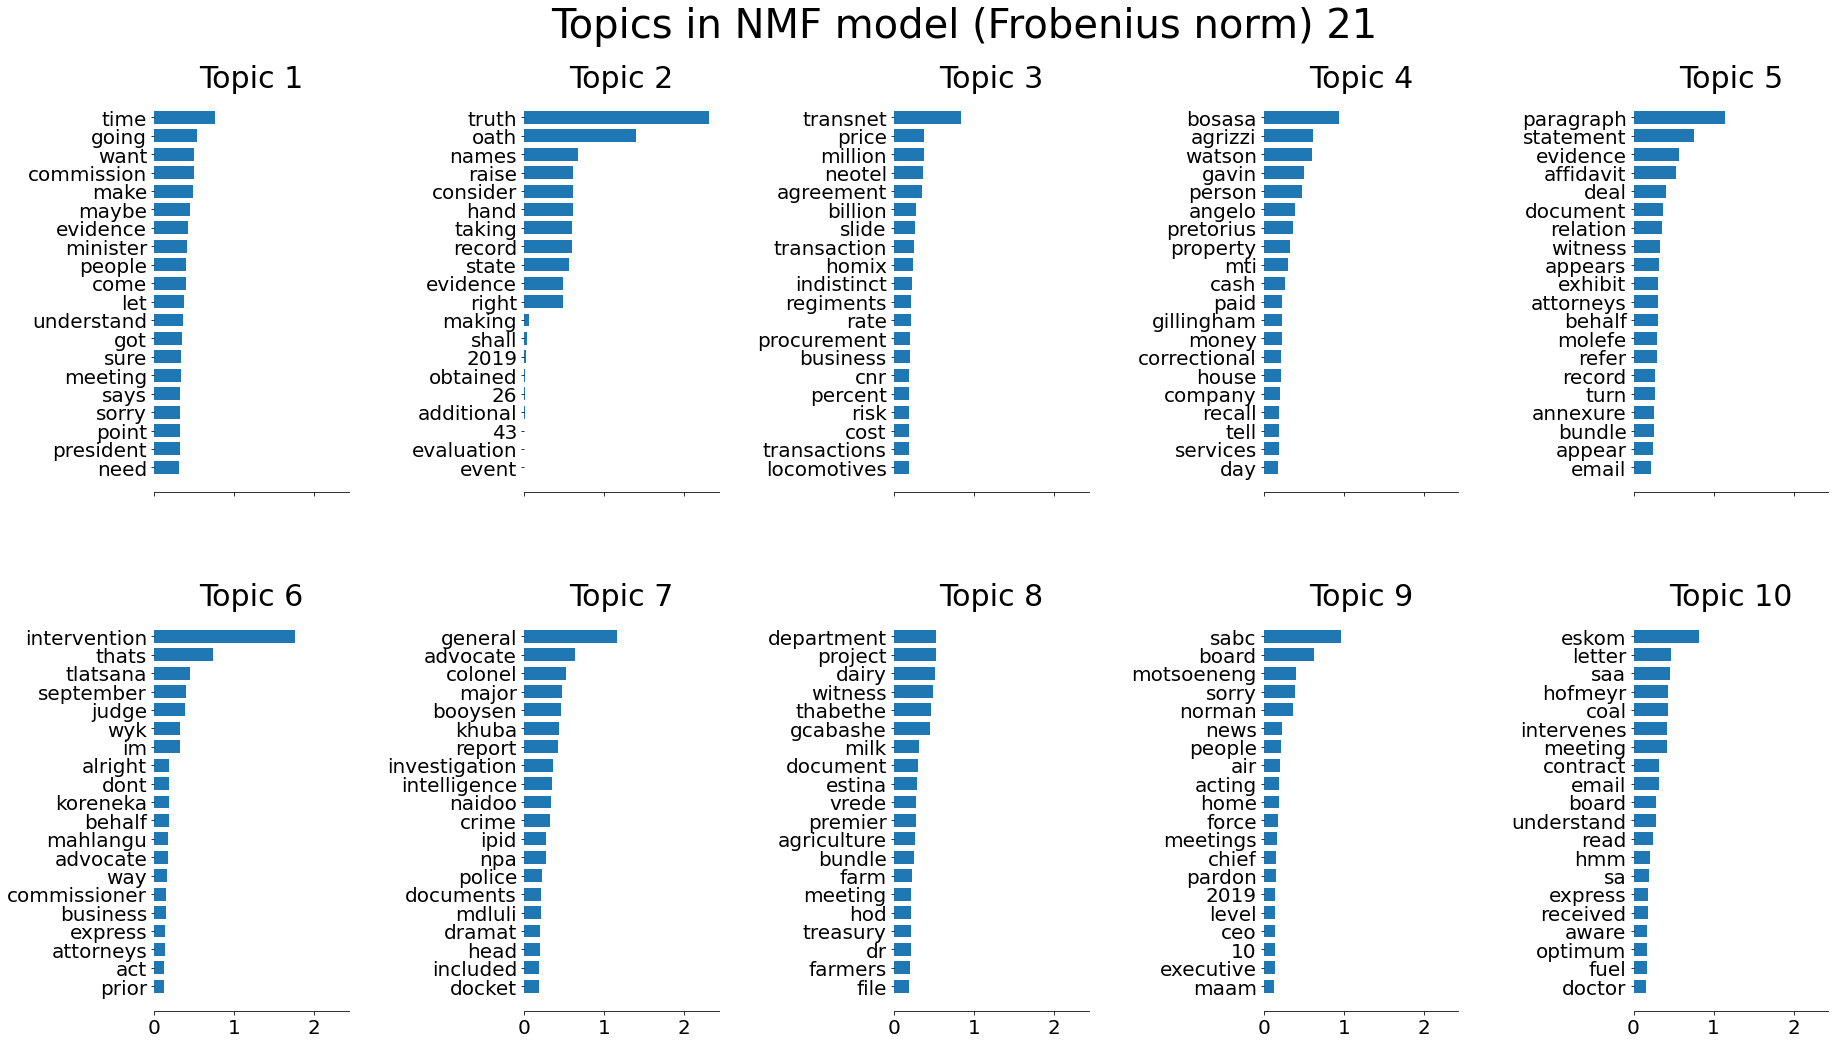

---->  [0.15808813763236845, 0.40782388078936577, 0.2182885172851849, 0.2264355346575025, 0.24441162922934126, 0.3881496489930353, 0.24064745820283526, 0.16441343165141936, 0.30325614409212365, 0.2049975085617833]


 Fitting the NMF model (generalized Kullback-Leibler divergence) with tf-idf features, n_samples=2500 and n_features=1000...
2019


/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1425: FutureWarning: `alpha` was deprecated in version 1.0 and will be removed in 1.2. Use `alpha_W` and `alpha_H` instead
  FutureWarning,
/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:294: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  FutureWarning,


2020
2021


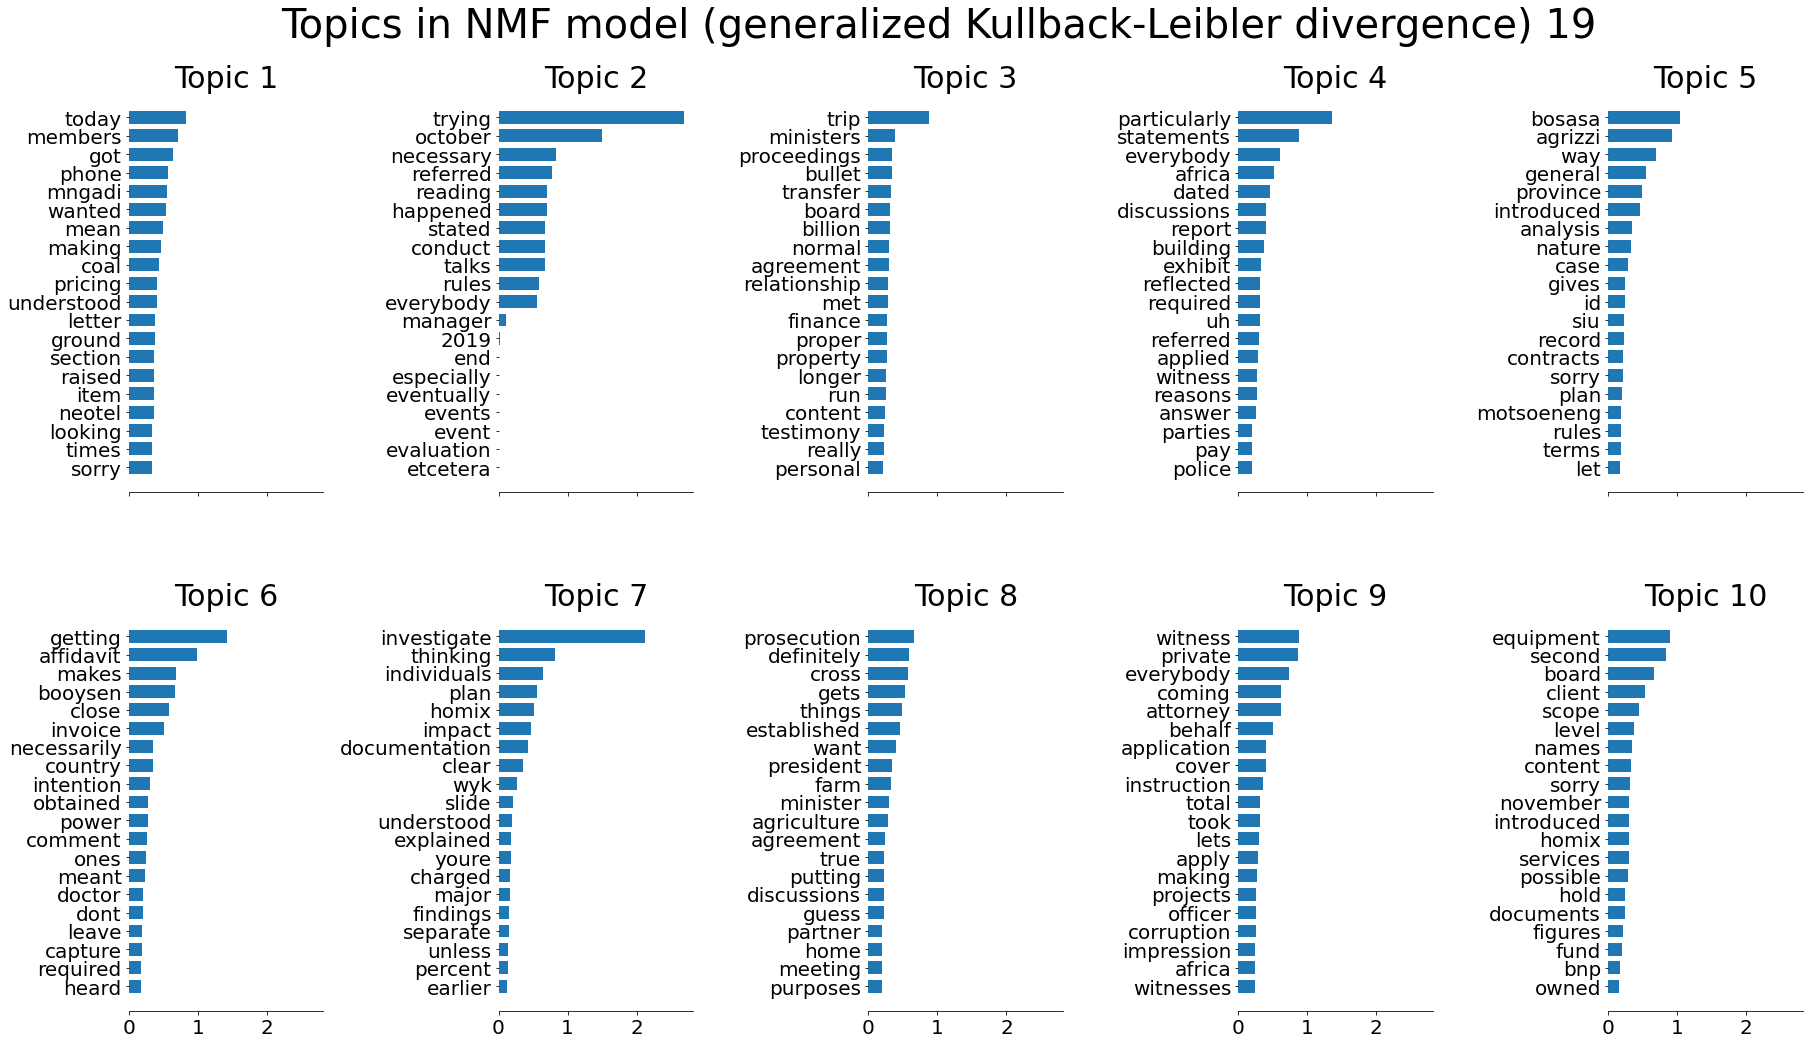

---->  [0.16571450147941527, 0.3988746387045169, 0.2018066545460001, 0.2719971790465768, 0.2631538993242086, 0.289488103015117, 0.36999879026188315, 0.18280772827756947, 0.2096863450673045, 0.23160315438161289]


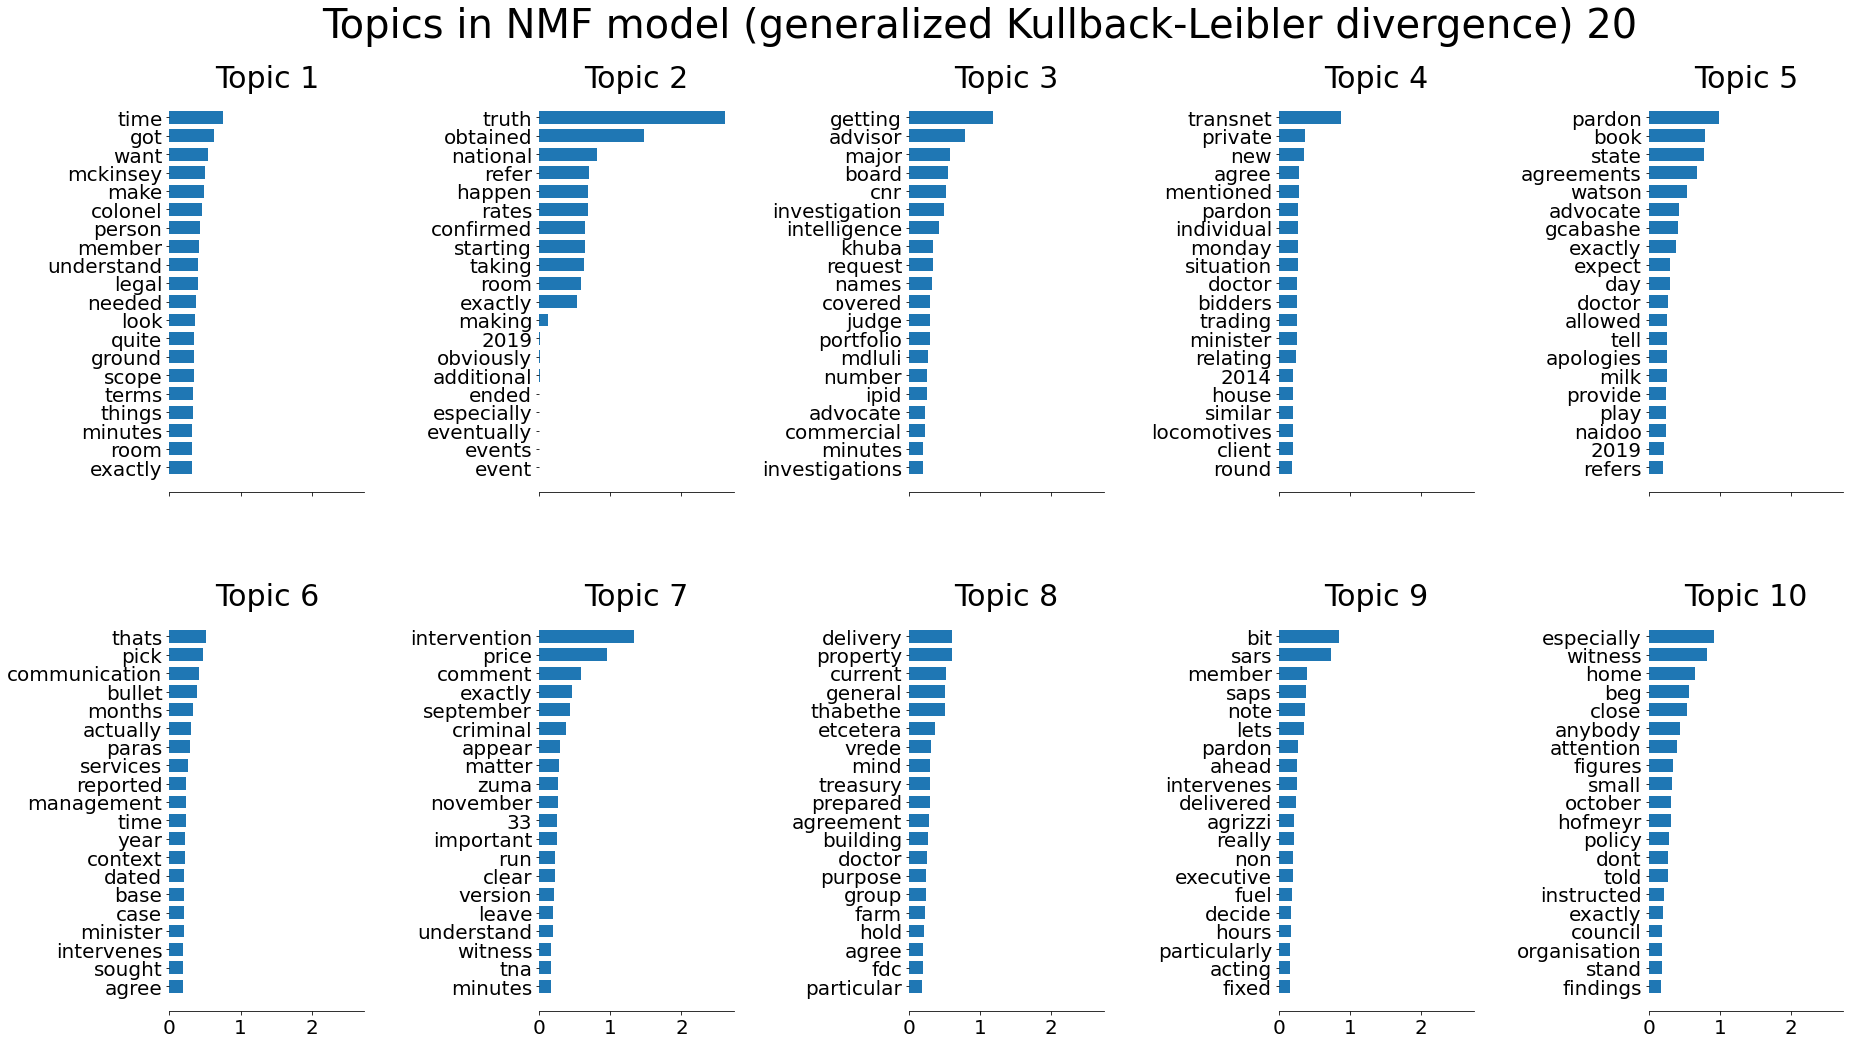

---->  [0.16521789680843885, 0.40178861718653003, 0.2472083388025451, 0.21946588422349086, 0.22128172408361985, 0.17770851207901553, 0.3142156453734789, 0.1842212185107702, 0.2689652554940115, 0.22959700324129004]


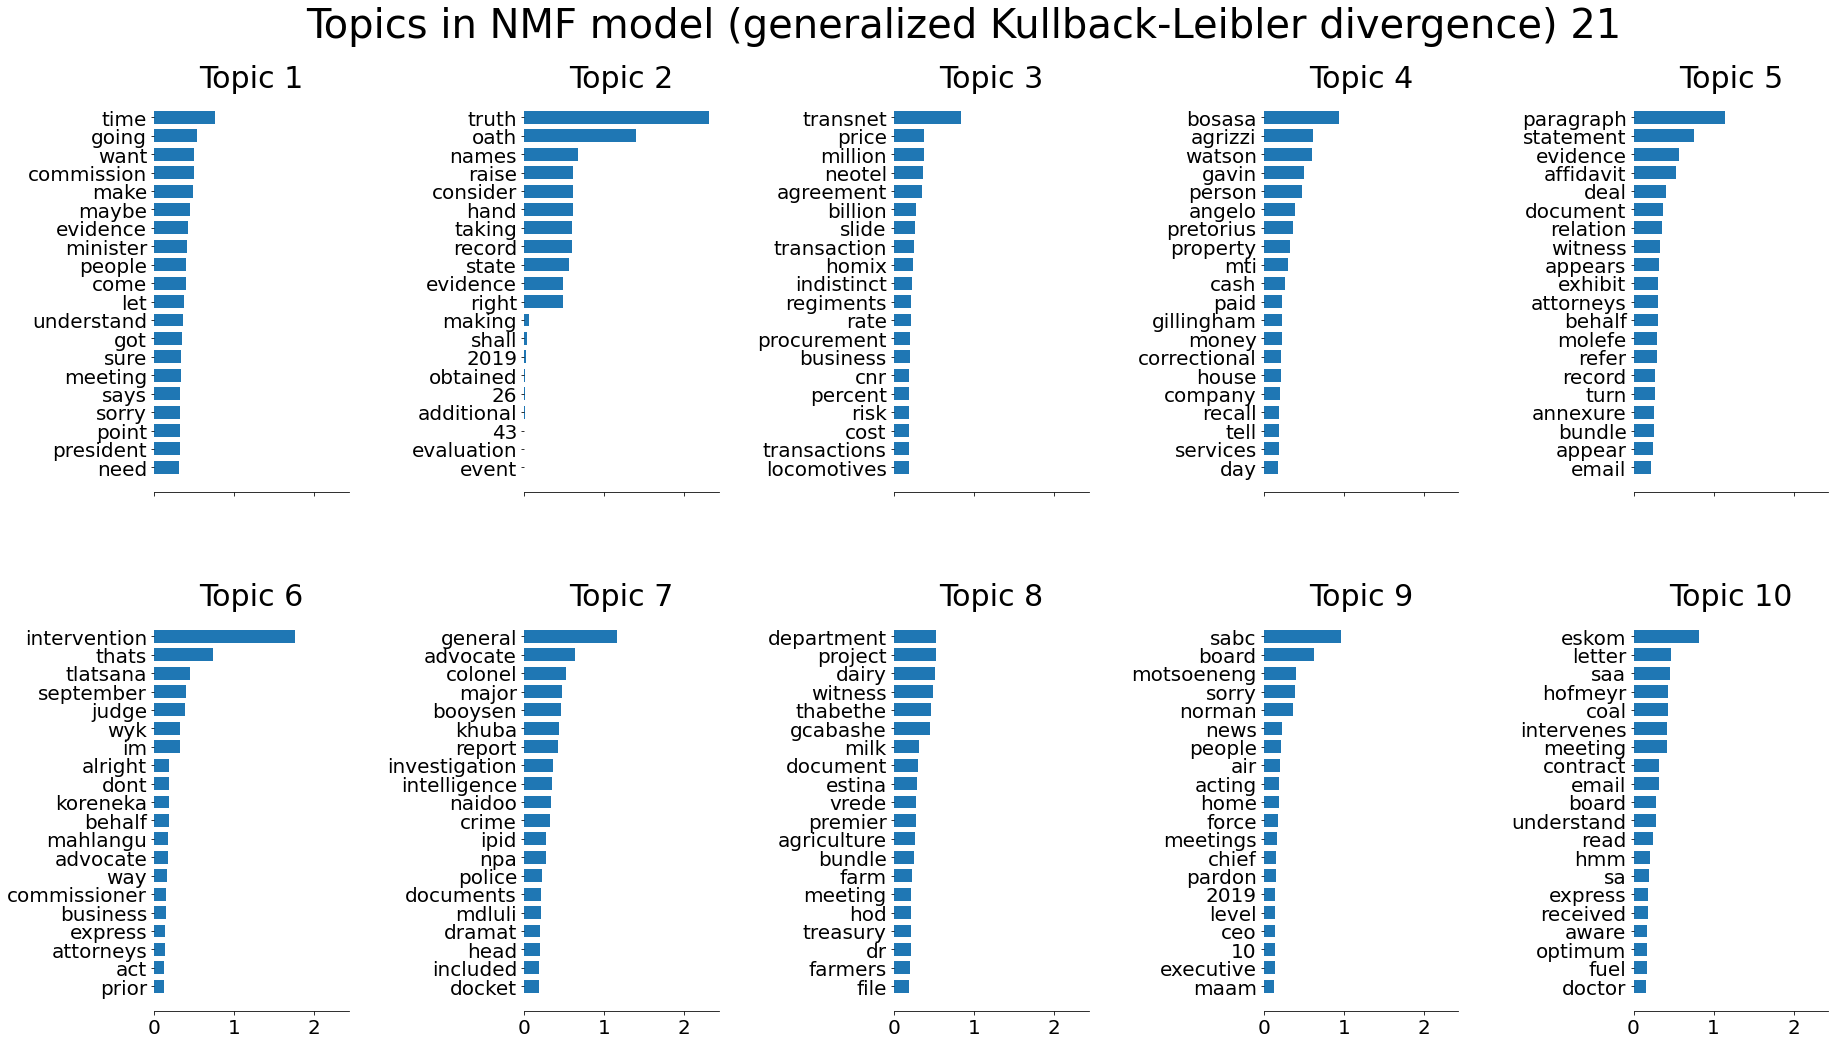

---->  [0.15808813763236845, 0.40782388078936577, 0.2182885172851849, 0.2264355346575025, 0.24441162922934126, 0.3881496489930353, 0.24064745820283526, 0.16441343165141936, 0.30325614409212365, 0.2049975085617833]


 Fitting LDA models with tf features, n_samples=2500 and n_features=1000...
done in 16.179s.


In [77]:
from time import time
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import NMF, LatentDirichletAllocation
from sklearn.datasets import fetch_20newsgroups

from numpy import *

n_samples = 2500
n_features = 1000
n_components = 10
n_top_words = 20

def plot_top_words(model, feature_names, n_top_words, title):
    fig, axes = plt.subplots(2, 5, figsize=(30, 15), sharex=True)
    axes = axes.flatten()
    counter = 0
    topicsList = []
    topicWeightsSum = []
    actualWords = []
    for topic_idx, topic in enumerate(model.components_):
        top_features_ind = topic.argsort()[:-n_top_words - 1:-1]
        top_features = [feature_names[i] for i in top_features_ind]
        weights = topic[top_features_ind]
        actualWords.append(top_features[0]) #save top 3 words in topic
        actualWords.append(top_features[1]) 
        actualWords.append(top_features[2])
        topTwoWeights = weights[0] + weights[1]#for year by year data
        # topThreeWeights = weights[0] + weights[1] + weights[2] #get weights of first 3 words
        # topicsList.append(topThreeWeights) #add to array - we wll divive with total to get graph
        topicsList.append(topTwoWeights) 
        weightsSum = sum(weights) #get total weights sum
        topicWeightsSum.append(weightsSum) #will be used in graph

        ax = axes[topic_idx]
        ax.barh(top_features, weights, height=0.7)
        ax.set_title(f'Topic {topic_idx +1}',
                     fontdict={'fontsize': 30})
        ax.invert_yaxis()
        ax.tick_params(axis='both', which='major', labelsize=20)
        for i in 'top right left'.split():
            ax.spines[i].set_visible(False)
        fig.suptitle(title, fontsize=40)

    plt.subplots_adjust(top=0.90, bottom=0.05, wspace=0.90, hspace=0.3)
    plt.show()
    plot_bar_chart(actualWords, topicsList, topicWeightsSum)
    
    
def plot_time_series(actualWords, topicsList, topicWeightsSum):
    valArray = []
    
def plot_bar_chart(actualWords, topicsList, topicWeightsSum):
    graphVals = []
    count = 0
    for topic in topicsList:
        val = ((topicsList[count]/topicWeightsSum[count])*100)/100
        graphVals.append(val)
        count = count+1
    # print(graphVals)
    wordCounter = 0
    import numpy as np
    import matplotlib.pyplot as plt
#     for year by year data
    data = [('Topic1 \n'+actualWords[0]+ ',\n' + actualWords[1], graphVals[0]), 
            ('Topic2 \n'+actualWords[2]+ ',\n' + actualWords[3], graphVals[1]), 
            ('Topic3 \n'+actualWords[4]+ ',\n' + actualWords[5], graphVals[2]), 
            ('Topic4 \n'+actualWords[6]+ ',\n' + actualWords[7], graphVals[3]),
            ('Topic5 \n'+actualWords[8]+ ',\n' + actualWords[9], graphVals[4]),
            ('Topic6 \n'+actualWords[10]+ ',\n' + actualWords[11], graphVals[5]),
            ('Topic7 \n'+actualWords[12]+ ',\n' + actualWords[13], graphVals[6]),
            ('Topic8 \n'+actualWords[14]+ ',\n' + actualWords[15], graphVals[7]),
            ('Topic9 \n'+actualWords[16]+ ',\n' + actualWords[17], graphVals[8]),
            ('Topic10 \n'+actualWords[18]+ ',\n' + actualWords[19], graphVals[9])
           ]
    print("----> ",graphVals)
    # print("************* ", data)
#     for normal all data
    # data = [('Topic1 \n'+actualWords[0]+ ',\n' + actualWords[1]+ ',\n' + actualWords[2], graphVals[0]), 
    #         ('Topic2 \n'+actualWords[3]+ ',\n' + actualWords[4]+ ',\n' + actualWords[5], graphVals[1]), 
    #         ('Topic3 \n'+actualWords[6]+ ',\n' + actualWords[7]+ ',\n' + actualWords[8], graphVals[2]), 
    #         ('Topic4 \n'+actualWords[9]+ ',\n' + actualWords[10]+ ',\n' + actualWords[11], graphVals[3]),
    #         ('Topic5 \n'+actualWords[12]+ ',\n' + actualWords[13]+ ',\n' + actualWords[14], graphVals[4]),
    #         ('Topic6 \n'+actualWords[15]+ ',\n' + actualWords[16]+ ',\n' + actualWords[17], graphVals[5]),
    #         ('Topic7 \n'+actualWords[18]+ ',\n' + actualWords[19]+ ',\n' + actualWords[20], graphVals[6]),
    #         ('Topic8 \n'+actualWords[21]+ ',\n' + actualWords[22]+ ',\n' + actualWords[23], graphVals[7]),
    #         ('Topic9 \n'+actualWords[24]+ ',\n' + actualWords[25]+ ',\n' + actualWords[26], graphVals[8]),
    #         ('Topic10 \n'+actualWords[27]+ ',\n' + actualWords[28]+ ',\n' + actualWords[29], graphVals[9])
    #        ]
    
#     temporary
#     n_groups = len(data)
#     vals_films = [x[1] for x in data]
#     legends_films = [x[0] for x in data]
#     fig, ax = plt.subplots(figsize=(9,4))
#     index = np.arange(n_groups)
#     bar_width = 0.25
#     opacity = 0.4
#     rects1 = plt.bar(index, vals_films, bar_width,alpha=opacity,color='g',label='Ocurrences')

#     plt.ylabel('Word Frequency')
#     plt.title('Top 3 dominant words per topic')
#     plt.xticks(index + bar_width, legends_films)
#     # plt.legend()

#     plt.tight_layout()
#     plt.show()

# Load the dataset and vectorize it.
print("Loading dataset...")
t0 = time()
data_samples = papers['speech_processed1'][:n_samples]
data_samples1 = papers1['speech_processed1'][:n_samples]
data_samples2 = papers2['speech_processed1'][:n_samples]
print("done in %0.3fs." % (time() - t0))

# Use tf-idf features for NMF.
print("Extracting tf-idf features for NMF...")
tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2,
                                   max_features=n_features,
                                   stop_words='english')
t0 = time()
tfidf = tfidf_vectorizer.fit_transform(data_samples)
# print("done in %0.3fs." % (time() - t0))
tfidf1 = tfidf_vectorizer.fit_transform(data_samples1)
tfidf2 = tfidf_vectorizer.fit_transform(data_samples2)

# Use tf (raw term count) features for LDA.
print("Extracting tf features for LDA...")
tf_vectorizer = CountVectorizer(max_df=0.95, min_df=2,
                                max_features=n_features,
                                stop_words='english')
t0 = time()
tf = tf_vectorizer.fit_transform(data_samples)
# print("done in %0.3fs." % (time() - t0))
tf1 = tf_vectorizer.fit_transform(data_samples1)
tf2 = tf_vectorizer.fit_transform(data_samples2)
print()

# Fit the NMF model
print("Fitting the NMF model (Frobenius norm) with tf-idf features, "
      "n_samples=%d and n_features=%d..."
      % (n_samples, n_features))
t0 = time()
nmf = NMF(n_components=n_components, random_state=1,
          alpha=.1, l1_ratio=.5).fit(tfidf)
print("done in %0.3fs." % (time() - t0))


tfidf_feature_names = tfidf_vectorizer.get_feature_names_out()
plot_top_words(nmf, tfidf_feature_names, n_top_words,
               'Topics in NMF model (Frobenius norm) 19')

plot_top_words(nmf1, tfidf_feature_names, n_top_words,
               'Topics in NMF model (Frobenius norm) 20')

plot_top_words(nmf2, tfidf_feature_names, n_top_words,
               'Topics in NMF model (Frobenius norm) 21')

# Fit the NMF model
print('\n' * 2, "Fitting the NMF model (generalized Kullback-Leibler "
      "divergence) with tf-idf features, n_samples=%d and n_features=%d..."
      % (n_samples, n_features))
t0 = time()
print("2019")
nmf = NMF(n_components=n_components, random_state=1,
          beta_loss='kullback-leibler', solver='mu', max_iter=1000, alpha=.1,
          l1_ratio=.5).fit(tfidf)
print("2020")
nmf1 = NMF(n_components=n_components, random_state=1,
          beta_loss='kullback-leibler', solver='mu', max_iter=1000, alpha=.1,
          l1_ratio=.5).fit(tfidf1)
print("2021")
nmf2 = NMF(n_components=n_components, random_state=1,
          beta_loss='kullback-leibler', solver='mu', max_iter=1000, alpha=.1,
          l1_ratio=.5).fit(tfidf2)

tfidf_feature_names = tfidf_vectorizer.get_feature_names_out()
plot_top_words(nmf, tfidf_feature_names, n_top_words,
               'Topics in NMF model (generalized Kullback-Leibler divergence) 19')
plot_top_words(nmf1, tfidf_feature_names, n_top_words,
               'Topics in NMF model (generalized Kullback-Leibler divergence) 20')
plot_top_words(nmf2, tfidf_feature_names, n_top_words,
               'Topics in NMF model (generalized Kullback-Leibler divergence) 21')

print('\n' * 2, "Fitting LDA models with tf features, "
      "n_samples=%d and n_features=%d..."
      % (n_samples, n_features))
lda = LatentDirichletAllocation(n_components=n_components, max_iter=5,
                                learning_method='online',
                                learning_offset=50.,
                                random_state=0)
t0 = time()
lda1 = lda.fit(tf)
lda2 = lda.fit(tf1)
lda3 = lda.fit(tf2)
print("done in %0.3fs." % (time() - t0))

# tf_feature_names = tf_vectorizer.get_feature_names_out()
# plot_top_words(lda, tf_feature_names, n_top_words, 'Topics in LDA model 19')
# plot_top_words(lda1, tf_feature_names, n_top_words, 'Topics in LDA model 20')
# plot_top_words(lda2, tf_feature_names, n_top_words, 'Topics in LDA model 21')

In [106]:
# importing the modules
import numpy as np
import matplotlib.pyplot as plt

# data to be plotted
# temp=[(6,5,15),(20,3,9),(1,12,7),(22,0.6,9)]
temp = [(0.16571450147941527, 0.16521789680843885, 0.15808813763236845), (0.3988746387045169, 0.40178861718653003,0.40782388078936577),
    (0.2018066545460001, 0.2472083388025451, 0.2182885172851849,), (0.2719971790465768, 0.21946588422349086, 0.2264355346575025),
    (0.2631538993242086, 0.22128172408361985, 0.24441162922934126,), (0.289488103015117, 0.17770851207901553, 0.3881496489930353),
    (0.36999879026188315, 0.3142156453734789, 0.24064745820283526,), (0.18280772827756947, 0.1842212185107702, 0.16441343165141936),
    (0.2096863450673045, 0.2689652554940115, 0.30325614409212365,), (0.23160315438161289, 0.22959700324129004, 0.2049975085617833)
       ]

data = [("mngadi","mckinsey", "minister"),("mngadi","mckinsey", "minister"),
    ("mngadi","mckinsey", "minister"),("mngadi","mckinsey", "minister"),
    ("mngadi","mckinsey", "minister"),("mngadi","mckinsey", "minister"),
    ("mngadi","mckinsey", "minister"),("mngadi","mckinsey", "minister"),
    ("mngadi","mckinsey", "minister"),("mngadi","mckinsey", "minister")
    ]

# plotting
# plt.title("Line graph")
# plt.xlabel("Time")
# plt.ylabel("Word frequency")
# plt.xticks(index + 0.25, legends_films)
# plt.figure(figsize=(10, 5))
# plt.plot(temp,x)
# plt.show()

AttributeError: 'AxesSubplot' object has no attribute 'show'

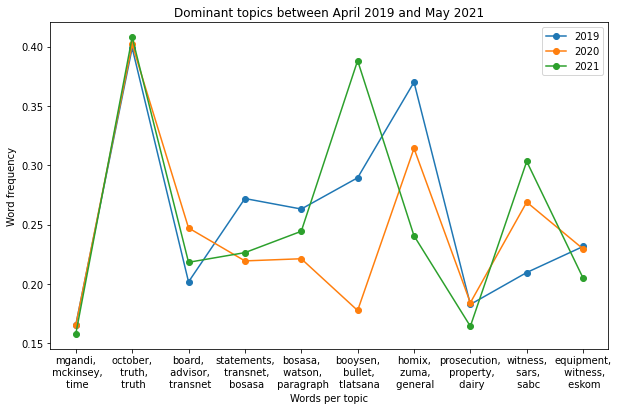

In [133]:
# 2019 data
# 2020 data
# 2021 data
# Import pyplot
import matplotlib.pyplot as plt
# Monthly average precipitation
boulder_monthly_precip = [
    (0.16571450147941527, 0.16521789680843885, 0.15808813763236845), (0.3988746387045169, 0.40178861718653003,0.40782388078936577),
    (0.2018066545460001, 0.2472083388025451, 0.2182885172851849), (0.2719971790465768, 0.21946588422349086, 0.2264355346575025),
    (0.2631538993242086, 0.22128172408361985, 0.24441162922934126), (0.289488103015117, 0.17770851207901553, 0.3881496489930353),
    (0.36999879026188315, 0.3142156453734789, 0.24064745820283526), (0.18280772827756947, 0.1842212185107702, 0.16441343165141936),
    (0.2096863450673045, 0.2689652554940115, 0.30325614409212365), (0.23160315438161289, 0.22959700324129004, 0.2049975085617833)
]

# Month names for plotting
months = ["mgandi,\n mckinsey,\n time", "october,\n truth,\n truth", 
          "board,\n advisor,\n transnet", "statements,\n transnet,\n bosasa", 
          "bosasa,\n watson,\n paragraph", "booysen,\n bullet,\n tlatsana", 
          "homix,\n zuma,\n general","prosecution,\n property,\n dairy",
          "witness,\n sars,\n sabc", "equipment,\n witness,\n eskom"]


# Define plot space
fig, ax = plt.subplots(figsize=(10, 6))

# Set plot title and axes labels
ax.set(title = "Dominant topics between April 2019 and May 2021",
       xlabel = "Words per topic",
       ylabel = "Word frequency")

# ax.legend(['2019', '2020', '2021']);
# Define x and y axes
ax.plot(months, boulder_monthly_precip, marker = 'o')

# Function add a legend
ax.legend(['2019', '2020', '2021'])

# function to show the plot
ax.show()